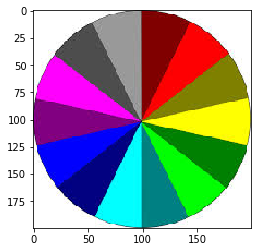

In [309]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import math
import random

%matplotlib inline
im = Image.open('/root/a.jpg', 'r')
im2 = Image.open('/root/sb.jpeg', 'r')
im = im.resize((200,200))
im2 = im2.resize((200,200))
imshow(np.asarray(im2))


In [291]:
def exchange(im,x,y):
    a = im.getpixel((x,y))
    b = im.getpixel((y,x))
    proc_img = im.copy()
    proc_img.putpixel((x,y),b)
    proc_img.putpixel((y,x),a)

    return proc_img

In [290]:
def exchange_part(im, start_x, start_y, fin_x, fin_y):
    crop_img = im.crop((start_x, start_y, fin_x, fin_y))
    proc_img = Image.new("RGB", ((fin_y - start_y), (fin_x - start_x)))
    
    
    for x in range(fin_x - start_x):
        for y in range(fin_y - start_y):
            proc_img.putpixel((y,x), crop_img.getpixel((x,y)))
    
    return proc_img

In [306]:
def exchange_part_multiple(im):
    img = im.copy()
    result1 = exchange_part(img, 35,0,65,200)
    result2 = exchange_part(img, 135,0,165,200)
    result3 = exchange_part(img, 0,35,200,65)
    result4 = exchange_part(img, 0,135,200,165)
    
    img.paste(result1, (0,35))
    img.paste(result2, (0,135))
    img.paste(result3, (35,0))
    img.paste(result4, (135,0))
    
    return img

In [292]:
def flip_part(im, start_x, start_y, fin_x, fin_y, direction):
    proc_img = im.crop((start_x, start_y, fin_x, fin_y))
    org_img = im.copy()
    # vertical
    if direction==0:
        proc_img = proc_img.transpose(Image.FLIP_LEFT_RIGHT)
    # horizontal
    elif direction==1:
        proc_img = proc_img.transpose(Image.FLIP_TOP_BOTTOM)
    else:
        print (" 0 : vertical, 1: horizontal")
        return None
    
    org_img.paste(proc_img, (start_x, start_y, fin_x, fin_y))
    return org_img
    

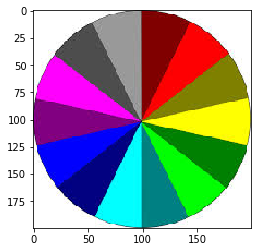

In [310]:
imshow(np.asarray(im2))

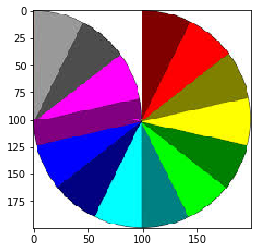

In [311]:
b = flip_part(im2, 0, 0, 100, 100, 0)
imshow(np.asarray(b))

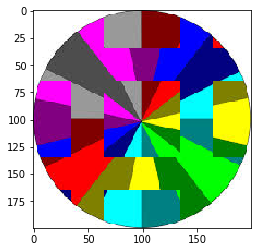

In [312]:
imshow(np.asarray(exchange_part_multiple(im2)))